In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import tree

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline

In [2]:
### Explanatory Data Analysis ###

In [51]:
# for this code to work, need to to download this
# 1. Open Anaconda prompt
# 2. run this line "conda install -c anaconda pandas-datareader"

import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame

start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2017, 12, 31)

df = web.DataReader("GOOG", 'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-22,1064.199951,1059.439941,1061.109985,1060.119995,755100.0,1060.119995
2017-12-26,1060.119995,1050.199951,1058.069946,1056.739990,760600.0,1056.739990
2017-12-27,1058.369995,1048.050049,1057.390015,1049.369995,1271900.0,1049.369995
2017-12-28,1054.750000,1044.770020,1051.599976,1048.140015,837100.0,1048.140015
2017-12-29,1049.699951,1044.900024,1046.719971,1046.400024,887500.0,1046.400024


In [52]:
# Moving Average (MA) smooths out price data by creating a constantly updated average price. 
# This is useful to cut down “noise” in our price chart. Furthermore, this Moving Average 
# could act as “Resistance” meaning from the downtrend and uptrend of stocks you could expect 
# it will follow the trend and less likely to deviate outside its resistance point.

close_px = df['Close']
mavg = close_px.rolling(window=50).mean()
mavg

Date
2004-08-19            NaN
2004-08-20            NaN
2004-08-23            NaN
2004-08-24            NaN
2004-08-25            NaN
2004-08-26            NaN
2004-08-27            NaN
2004-08-30            NaN
2004-08-31            NaN
2004-09-01            NaN
2004-09-02            NaN
2004-09-03            NaN
2004-09-07            NaN
2004-09-08            NaN
2004-09-09            NaN
2004-09-10            NaN
2004-09-13            NaN
2004-09-14            NaN
2004-09-15            NaN
2004-09-16            NaN
2004-09-17            NaN
2004-09-20            NaN
2004-09-21            NaN
2004-09-22            NaN
2004-09-23            NaN
2004-09-24            NaN
2004-09-27            NaN
2004-09-28            NaN
2004-09-29            NaN
2004-09-30            NaN
                 ...     
2017-11-16     977.181198
2017-11-17     979.032998
2017-11-20     980.818998
2017-11-21     982.867397
2017-11-22     984.884796
2017-11-24     987.194796
2017-11-27     989.873196
2017-11

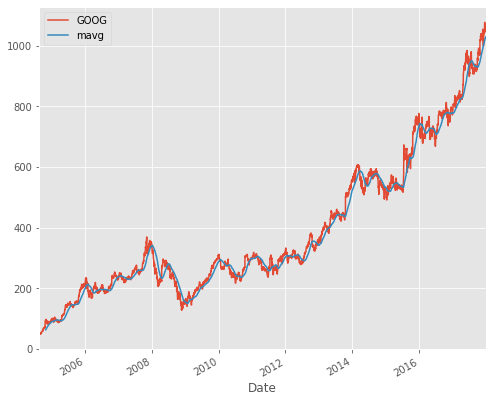

In [53]:
# Plotting the Moving Average

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='GOOG')
mavg.plot(label='mavg')
plt.legend()

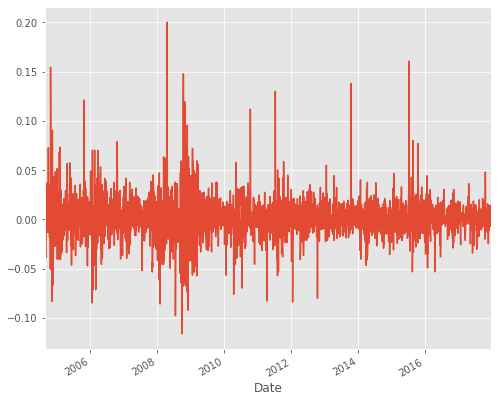

In [54]:
# Measure Expected Return

rets = close_px / close_px.shift(1) - 1
rets.plot(label='return')

In [55]:
# Creating lags 20 days back

for i in range(1,21):
    col_name = 'close' + str(i)
    df[col_name] = close_px.shift(i)
    
# Drop missing value
dfreg = df.dropna()
print(dfreg.head())



                 High        Low       Open      Close      Volume  Adj Close  \
Date                                                                            
2004-09-17  58.525631  56.562988  56.996365  58.525631   9517400.0  58.525631   
2004-09-20  60.572956  58.166977  58.256641  59.457142  10679200.0  59.457142   
2004-09-21  59.985161  58.535595  59.681301  58.699978   7263000.0  58.699978   
2004-09-22  59.611561  58.186901  58.480801  58.968971   7617100.0  58.968971   
2004-09-23  61.086033  58.291508  59.198112  60.184414   8576100.0  60.184414   

               close1     close2     close3     close4  ...    close11  \
Date                                                    ...              
2004-09-17  56.772205  55.790882  55.536835  53.549286  ...  49.937820   
2004-09-20  58.525631  56.772205  55.790882  55.536835  ...  50.565468   
2004-09-21  59.457142  58.525631  56.772205  55.790882  ...  49.818268   
2004-09-22  58.699978  59.457142  58.525631  56.772205  ...  5

In [56]:
# Pre-processing & Splitting of 20 days lagged

X = dfreg.iloc[:,6:]
y = dfreg.iloc[:,5]

X_train = X.loc[:'2013-12-29']
X_test = X.loc['2013-12-29':]

print(X_train.iloc[:,1])
print(X_test.iloc[:,1])

X_train = X_train.values
X_test = X_test.values

y_train = y.loc[:'2013-12-29']
y_test = y.loc['2013-12-29':]

y_train = y_train.values
y_test = y_test.values

X_train.shape, y_train.shape, X_test.shape , y_test.shape

Date
2004-09-17     55.790882
2004-09-20     56.772205
2004-09-21     58.525631
2004-09-22     59.457142
2004-09-23     58.699978
2004-09-24     58.968971
2004-09-27     60.184414
2004-09-28     59.691261
2004-09-29     58.909195
2004-09-30     63.193138
2004-10-01     65.295258
2004-10-04     64.558022
2004-10-05     66.042458
2004-10-06     67.277824
2004-10-07     68.926643
2004-10-08     68.284058
2004-10-11     69.165749
2004-10-12     68.607841
2004-10-13     67.377449
2004-10-14     68.443459
2004-10-15     70.186920
2004-10-18     70.734871
2004-10-19     71.785927
2004-10-20     74.301498
2004-10-21     73.693779
2004-10-22     69.982689
2004-10-25     74.411087
2004-10-26     85.893051
2004-10-27     93.350098
2004-10-28     90.560555
                 ...    
2013-11-14    504.000885
2013-11-15    514.307251
2013-11-18    515.682068
2013-11-19    514.850220
2013-11-20    513.848938
2013-11-21    510.685822
2013-11-22    509.246216
2013-11-25    515.104248
2013-11-26    514.01

((2337, 20), (2337,), (1009, 20), (1009,))

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [57]:
# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)

# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [58]:
# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [59]:
# accuracy of model with train set

confidencereg = clfreg.score(X_train, y_train)
confidencepoly2 = clfpoly2.score(X_train, y_train)
confidencepoly3 = clfpoly3.score(X_train, y_train)
confidenceknn = clfknn.score(X_train, y_train)

# results
print('The linear regression accuracy is', confidencereg)
print('The quadratic regression 2 accuracy is', confidencepoly2)
print('The quadratic regression 3 accuracy is', confidencepoly3)
print('The knn regression accuracy is', confidenceknn)

The linear regression accuracy is 0.9971785808209316
The quadratic regression 2 accuracy is 0.9975443039231339
The quadratic regression 3 accuracy is 0.9996042918835325
The knn regression accuracy is 0.9988035476029645


In [60]:
# accuracy of model with test set

confidencereg = clfreg.score(X_test, y_test)
confidencepoly2 = clfpoly2.score(X_test,y_test)
confidencepoly3 = clfpoly3.score(X_test,y_test)
confidenceknn = clfknn.score(X_test, y_test)

# results
print('The linear regression accuracy is', confidencereg)
print('The quadratic regression 2 accuracy is', confidencepoly2)
print('The quadratic regression 3 accuracy is', confidencepoly3)
print('The knn regression accuracy is', confidenceknn)

The linear regression accuracy is 0.9962752713282794
The quadratic regression 2 accuracy is 0.9916700389183993
The quadratic regression 3 accuracy is -3.561415563771498
The knn regression accuracy is -0.9417648562906897


In [61]:
# rmse of model with test set

from sklearn.metrics import mean_squared_error
from math import sqrt

rmsereg = sqrt(mean_squared_error(y_test, clfreg.predict(X_test)))
rmsepoly2 = sqrt(mean_squared_error(y_test, clfpoly2.predict(X_test)))
rmsepoly3 = sqrt(mean_squared_error(y_test, clfpoly3.predict(X_test)))
rmseknn = sqrt(mean_squared_error(y_test, clfknn.predict(X_test)))

# results
print('The linear regression rmse is', rmsereg)
print('The quadratic regression 2 rmse is', rmsepoly2)
print('The quadratic regression 3 rmse is', rmsepoly3)
print('The knn regression rmse is', rmseknn)

The linear regression rmse is 9.379497993966016
The quadratic regression 2 rmse is 14.026643528537655
The quadratic regression 3 rmse is 328.2328879343225
The knn regression rmse is 214.1561704350188


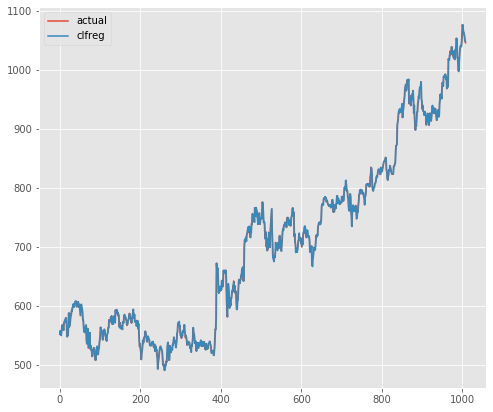

In [62]:
# plot of estimated and actual close price

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

y_test = pd.DataFrame(y_test)
y_clfreg = pd.DataFrame(clfreg.predict(X_test))

plt.plot(y_test, label="actual")
plt.plot(y_clfreg, label="clfreg")

plt.legend()

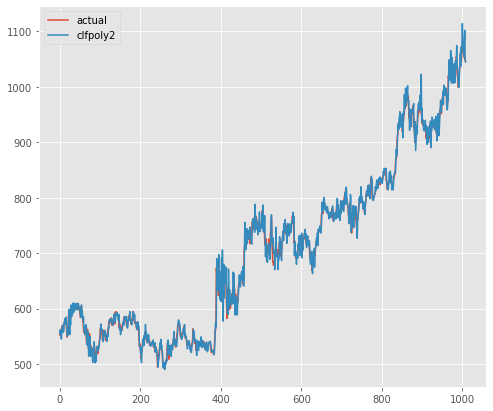

In [63]:
y_test = pd.DataFrame(y_test)
y_clfpoly2 = pd.DataFrame(clfpoly2.predict(X_test))

plt.plot(y_test, label="actual")
plt.plot(y_clfpoly2, label="clfpoly2")

plt.legend()

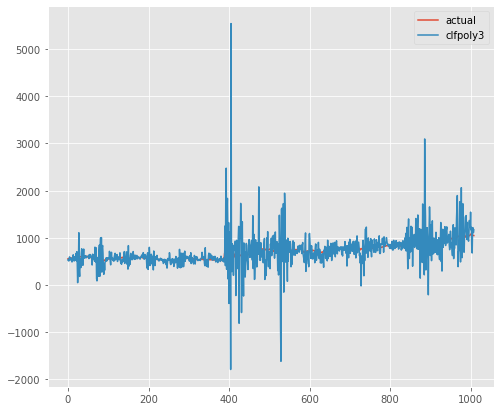

In [64]:
y_test = pd.DataFrame(y_test)
y_clfpoly3 = pd.DataFrame(clfpoly3.predict(X_test))

plt.plot(y_test, label="actual")
plt.plot(y_clfpoly3, label="clfpoly3")

plt.legend()

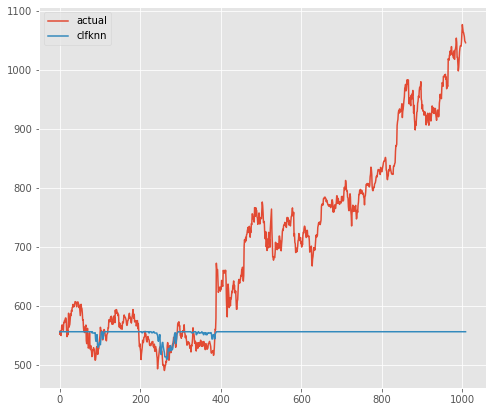

In [65]:
y_test = pd.DataFrame(y_test)
y_clfknn = pd.DataFrame(clfknn.predict(X_test))

plt.plot(y_test, label="actual")
plt.plot(y_clfknn, label="clfknn")

plt.legend()

In [20]:
# Autocorrelation suggest that the model will be overfitted. Hence, we expect a high test rmse. 
# But when the model is applied to the test set,the test rmse is suprisingly quite low. 

# Why?! 
# Possible suggestions:
# - no. of data points is too low (?)
# -> realised that the train-test split was randomnised and not split on a fixed date
# randomnized -> takes into account seasonality? 
# fixed date -> does not take into account seasonality?

# for time-series analysis, new data points that you'll get will be future dates, so doesn't make sense if you randomnise the 
# split since you'll be trying to predict future dates with the model. But at the same time, date was not one of the IVs used 
# in the model

# Next step:
# - use 20 years historical data
# - match quarter to quarter data to take into account the seasonaility of the stock prices

In [66]:
lr = LinearRegression()
lr.fit(X_train, y_train)

train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)

print("linear regression train score:", train_score)
print("linear regression test score:", test_score)


linear regression train score: 0.9971785808209316
linear regression test score: 0.9962752713282794


In [67]:
# Ridge regression with low alpha

rr = Ridge(alpha=0.01) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles

rr.fit(X_train, y_train)
print(pd.Series(rr.coef_, index = X.columns))

Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)

print("ridge regression train score low alpha:", Ridge_train_score)
print("ridge regression test score low alpha:", Ridge_test_score)

close1     0.996077
close2     0.020080
close3    -0.014208
close4     0.021787
close5    -0.020453
close6    -0.025158
close7     0.031512
close8     0.014817
close9    -0.028281
close10    0.019382
close11   -0.011710
close12    0.021064
close13   -0.026507
close14   -0.005010
close15    0.011848
close16   -0.034964
close17    0.050852
close18   -0.047813
close19    0.037315
close20   -0.010968
dtype: float64
ridge regression train score low alpha: 0.9971785808209316
ridge regression test score low alpha: 0.9962752712719987


In [68]:
# Ridge regression with high alpha

rr100 = Ridge(alpha=100) #  comparison with alpha value

rr100.fit(X_train, y_train)
print(pd.Series(rr.coef_, index = X.columns))

Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)
print("ridge regression train score high alpha:", Ridge_train_score100)
print("ridge regression test score high alpha:", Ridge_test_score100)


close1     0.996077
close2     0.020080
close3    -0.014208
close4     0.021787
close5    -0.020453
close6    -0.025158
close7     0.031512
close8     0.014817
close9    -0.028281
close10    0.019382
close11   -0.011710
close12    0.021064
close13   -0.026507
close14   -0.005010
close15    0.011848
close16   -0.034964
close17    0.050852
close18   -0.047813
close19    0.037315
close20   -0.010968
dtype: float64
ridge regression train score high alpha: 0.9971785715722227
ridge regression test score high alpha: 0.9962746983526372


linear regression test score: 0.9962752713282794
ridge regression test score low alpha: 0.9962752712719987
ridge regression test score high alpha: 0.9962746983526372


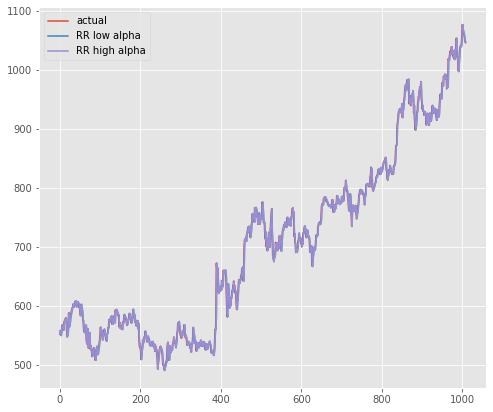

In [69]:
y_test = pd.DataFrame(y_test)
y_rr = pd.DataFrame(rr.predict(X_test))
y_rr100 = pd.DataFrame(rr100.predict(X_test))

plt.plot(y_test, label="actual")
plt.plot(y_rr, label="RR low alpha")
plt.plot(y_rr100, label="RR high alpha")

plt.legend()

print("linear regression test score:", test_score)
print("ridge regression test score low alpha:", Ridge_test_score)
print("ridge regression test score high alpha:", Ridge_test_score100)

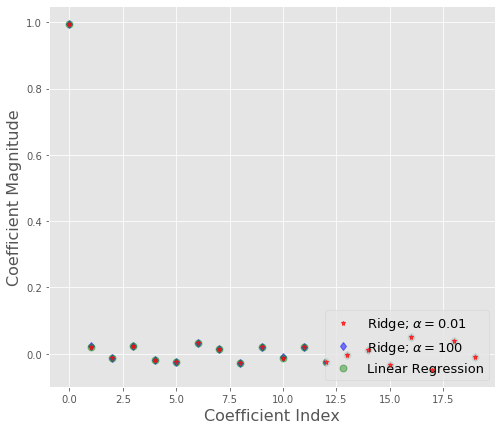

In [70]:
# Ridge regression with low alpha vs Ridge regression with high alpha

plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

# There is very little difference between the ridge resgression with low and high alpha, both in terms of accuracy and coefficients


training score: 0.9971637951193982
test score:  0.9963110572889563
number of features used:  3
training score for alpha=0.01: 0.9971785484147391
test score for alpha =0.01:  0.996276819790223
number of features used: for alpha =0.01: 20
training score for alpha=0.0001: 0.997178580817909
test score for alpha =0.0001:  0.9962752825625555
number of features used: for alpha =0.0001: 20
LR training score: 0.9971785808209316
LR test score:  0.9962752713282794


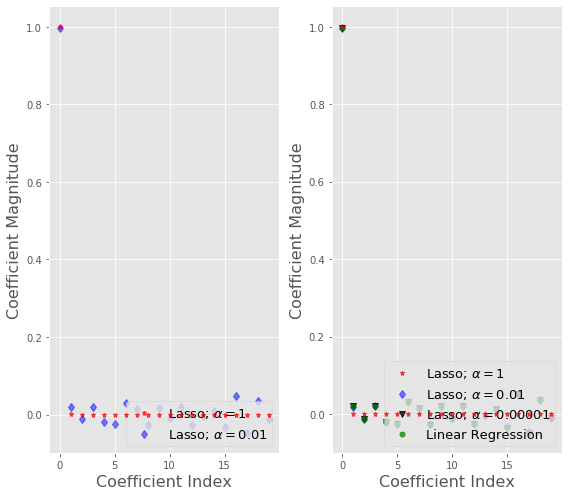

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
print("training score:", train_score)
print("test score: ", test_score)
print("number of features used: ", coeff_used)

lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
print("training score for alpha=0.01:", train_score001)
print("test score for alpha =0.01: ", test_score001)
print("number of features used: for alpha =0.01:", coeff_used001)

lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print("training score for alpha=0.0001:", train_score00001)
print("test score for alpha =0.0001: ", test_score00001)
print("number of features used: for alpha =0.0001:", coeff_used00001)


lr = LinearRegression()
lr.fit(X_train,y_train)
lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)
print("LR training score:", lr_train_score)
print("LR test score: ", lr_test_score)
plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()


test score:  0.9963110572889563
number of features used:  3
test score for alpha =0.01:  0.996276819790223
number of features used: for alpha =0.01: 20
test score for alpha =0.0001:  0.9962752825625555
number of features used: for alpha =0.0001: 20


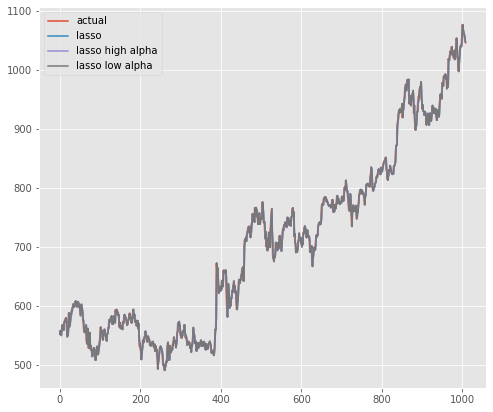

In [72]:
y_test = pd.DataFrame(y_test)
y_lasso = pd.DataFrame(lasso.predict(X_test))
y_lasso001 = pd.DataFrame(lasso001.predict(X_test))
y_lasso00001 = pd.DataFrame(lasso00001.predict(X_test))

plt.plot(y_test, label="actual")
plt.plot(y_lasso, label="lasso")
plt.plot(y_lasso001, label="lasso high alpha")
plt.plot(y_lasso00001, label="lasso low alpha")

plt.legend()

print("test score: ", test_score)
print("number of features used: ", coeff_used)

print("test score for alpha =0.01: ", test_score001)
print("number of features used: for alpha =0.01:", coeff_used001)

print("test score for alpha =0.0001: ", test_score00001)
print("number of features used: for alpha =0.0001:", coeff_used00001)

In [ ]:
# Highest accruacy gotten so far is 0.8975171925131225 with lasso 


In [77]:
# Best model on new data

start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2019, 10, 9)

dfnew = web.DataReader("GOOG", 'yahoo', start, end)
dfnew.tail()

# Creating lags 20 days back

for i in range(1,21):
    col_name = 'close' + str(i)
    dfnew[col_name] = close_px.shift(i)
    
# Drop missing value
dfnew = dfnew.dropna()
dfnew.head()

X = dfnew.iloc[:,6:]
y = dfnew.iloc[:,5]

X = X.values
y = y.values

test_score=lasso.score(X,y)

print("test score: ", test_score)





,High,Low,Open,Close,Volume,Adj Close,close1,close2,close3,close4,...,close11,close12,close13,close14,close15,close16,close17,close18,close19,close20
Date,,,,,,,,,,,,,,,,,,,,,
2019-10-03,1189.060059,1162.430054,1180.000000,1187.829956,1621200,1187.829956,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-04,1211.439941,1189.170044,1191.890015,1209.000000,1162400,1209.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-07,1218.203979,1203.750000,1204.400024,1207.680054,842900,1207.680054,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-08,1206.079956,1189.010010,1197.589966,1189.130005,1039300,1189.130005,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-09,1208.349976,1197.630005,1199.349976,1202.310059,867700,1202.310059,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


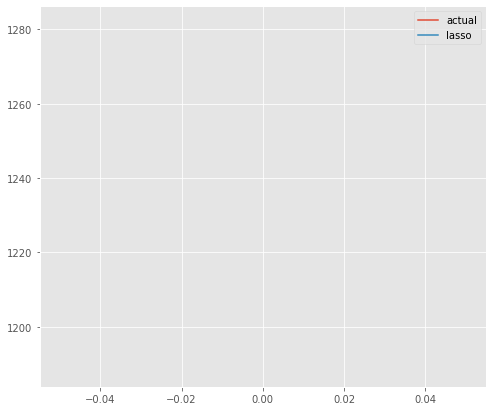

In [43]:
y_test = pd.DataFrame(y)
y_lasso = pd.DataFrame(lasso.predict(X))

mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

plt.plot(y_test, label="actual")
plt.plot(y_lasso, label="lasso")
plt.legend()